In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py

sys.path.insert(0, '/home/josef/Programs/ed')
import ed.ed as ed

In [9]:
beta = 1.
u_value = 2.
impu = ed.ImpurityED(vk=[0.3], epsk=[0.5], beta=beta, mu=-0.1, u_value=u_value)

In [3]:
niw = 20
iw = np.pi / beta * (2. * np.arange(-niw, niw) + 1.)

In [4]:
# component 52
op1 = impu.crea_arr[1] @ impu.annh_arr[1] @ impu.annh_arr[0]  # q
op2 = impu.crea_arr[0] @ impu.crea_arr[1] @ impu.annh_arr[1]  # q^\dag

op1 = np.array(impu.basis.conj().T @ op1 @ impu.basis)
op2 = np.array(impu.basis.conj().T @ op2 @ impu.basis)

qq_raw_52 = np.asarray([impu.ff_ed(freq, op1, op2) for freq in iw])

# component 54
op1 = impu.crea_arr[1] @ impu.annh_arr[1] @ impu.annh_arr[0]
op2 = impu.crea_arr[1] @ impu.crea_arr[0] @ impu.annh_arr[1]

op1 = np.array(impu.basis.conj().T @ op1 @ impu.basis)
op2 = np.array(impu.basis.conj().T @ op2 @ impu.basis)

qq_raw_54 = np.asarray([impu.ff_ed(freq, op1, op2) for freq in iw])

# component 44
op1 = impu.crea_arr[1] @ impu.annh_arr[0] @ impu.annh_arr[1]
op2 = impu.crea_arr[0] @ impu.crea_arr[1] @ impu.annh_arr[1]

op1 = np.array(impu.basis.conj().T @ op1 @ impu.basis)
op2 = np.array(impu.basis.conj().T @ op2 @ impu.basis)

qq_raw_44 = np.asarray([impu.ff_ed(freq, op1, op2) for freq in iw])

# component 46
op1 = impu.crea_arr[1] @ impu.annh_arr[0] @ impu.annh_arr[1]
op2 = impu.crea_arr[1] @ impu.crea_arr[0] @ impu.annh_arr[1]

op1 = np.array(impu.basis.conj().T @ op1 @ impu.basis)
op2 = np.array(impu.basis.conj().T @ op2 @ impu.basis)

qq_raw_46 = np.asarray([impu.ff_ed(freq, op1, op2) for freq in iw])

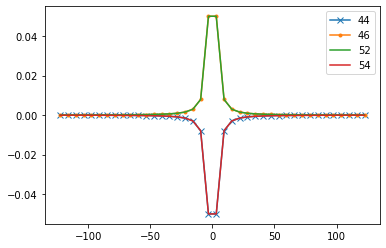

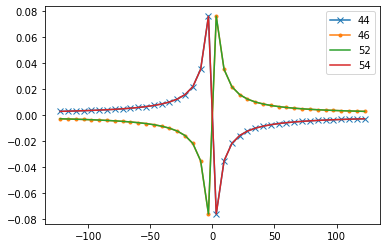

In [5]:
plt.plot(iw, qq_raw_44.real, label='44', marker='x')
plt.plot(iw, qq_raw_46.real, label='46', marker='.')
plt.plot(iw, qq_raw_52.real, label='52')
plt.plot(iw, qq_raw_54.real, label='54')
plt.legend()
plt.show()


plt.plot(iw, qq_raw_44.imag, label='44', marker='x')
plt.plot(iw, qq_raw_46.imag, label='46', marker='.')
plt.plot(iw, qq_raw_52.imag, label='52')
plt.plot(iw, qq_raw_54.imag, label='54')
plt.legend()
plt.show()

In [6]:
qmc_file = h5py.File('/home/josef/Programs/w2dynamics_modularization/benchmark/mod_worm/3/qq_new-2021-06-09-Wed-18-18-08.hdf5', 'r')
n_meas = int(qmc_file['.config'].attrs['qmc.nmeas'])
eta = qmc_file['worm-001/ineq-001/worm-eta/00052/value'][0]
old_eta = 0.746329
qq_qmc = qmc_file['worm-001/ineq-001/qqiw-worm-new/00052/value'][()]# * eta# / n_meas

acc = qmc_file['worm-001/ineq-001/accept-worm-ins/00052/value'][()]
print(acc)

qmc_file.close()

fact = np.mean(np.abs(qq_qmc / qq_raw))
# fact = 5.61  # for beta=20
# fact = 32.  # for beta=10
# fact = 115.66  # for beta=5
# fact = 738.06  # for beta=2
# fact = 3792.82 # for beta=1
qq_qmc /= fact
print(fact)
print(eta)
beta_list = np.array([1., 2., 3., 5., 10., 20.])
fact_list = np.array([3792.82, 738.06, 335.50, 115.66, 32., 5.61])
eta_list = np.array([7.70337, 3.39382, 2.2952, 1.34185, 0.706634, 0.297302])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.17265098 0.         0.         0.
 0.         0.         0.        ]


NameError: name 'qq_raw' is not defined

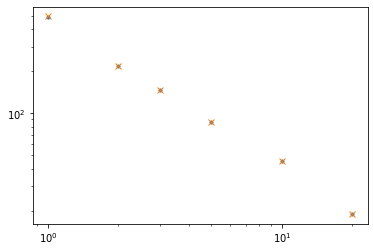

In [19]:
plt.loglog(beta_list, fact_list / eta_list, marker='.', linestyle='None')
plt.loglog(beta_list, 64 * eta_list, marker='x', linestyle='None')
plt.show()

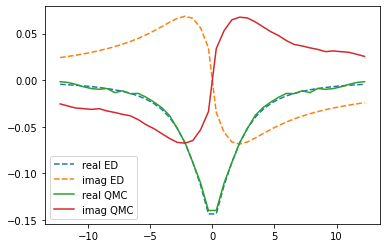

In [20]:
plt.plot(iw, qq_raw.real, ls='--', label='real ED')
plt.plot(iw, qq_raw.imag, ls='--', label='imag ED')
plt.plot(iw, qq_qmc.real, label='real QMC')
plt.plot(iw, qq_qmc.imag, label='imag QMC')
plt.legend()
plt.show()

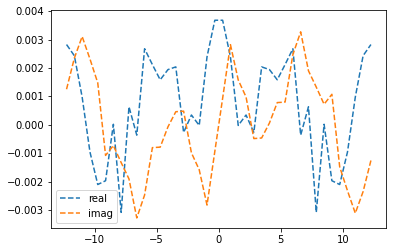

In [11]:
plt.plot(iw, (qq_raw + qq_qmc).real, label='real', ls='--')
plt.plot(iw, (qq_raw - qq_qmc).imag, label='imag', ls='--')
plt.legend()
plt.show()

In [12]:
qmc_file = h5py.File('/home/josef/Programs/w2dynamics_modularization/benchmark/mod_worm/3/qq_new-2021-06-10-Thu-17-54-30.hdf5', 'r')
qq_qmc_44 = qmc_file['worm-001/ineq-001/qqiw-worm-new/00044/value'][()]
qq_qmc_46 = qmc_file['worm-001/ineq-001/qqiw-worm-new/00046/value'][()]
qq_qmc_52 = qmc_file['worm-001/ineq-001/qqiw-worm-new/00052/value'][()]
qq_qmc_54 = qmc_file['worm-001/ineq-001/qqiw-worm-new/00054/value'][()]

qmc_file.close()

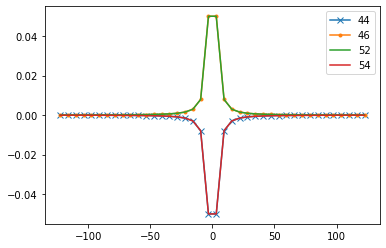

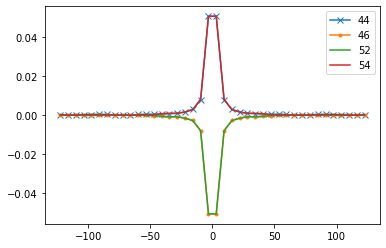

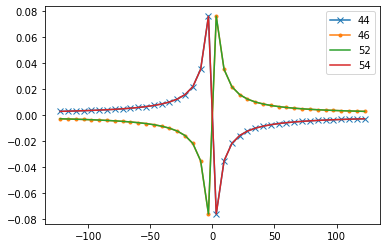

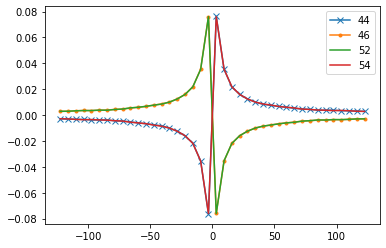

In [13]:
plt.plot(iw, qq_raw_44.real, label='44', marker='x')
plt.plot(iw, qq_raw_46.real, label='46', marker='.')
plt.plot(iw, qq_raw_52.real, label='52')
plt.plot(iw, qq_raw_54.real, label='54')
plt.legend()
plt.show()

plt.plot(iw, qq_qmc_44.real, label='44', marker='x')
plt.plot(iw, qq_qmc_46.real, label='46', marker='.')
plt.plot(iw, qq_qmc_52.real, label='52')
plt.plot(iw, qq_qmc_54.real, label='54')
plt.legend()
plt.show()

plt.plot(iw, qq_raw_44.imag, label='44', marker='x')
plt.plot(iw, qq_raw_46.imag, label='46', marker='.')
plt.plot(iw, qq_raw_52.imag, label='52')
plt.plot(iw, qq_raw_54.imag, label='54')
plt.legend()
plt.show()


plt.plot(iw, qq_qmc_44.imag, label='44', marker='x')
plt.plot(iw, qq_qmc_46.imag, label='46', marker='.')
plt.plot(iw, qq_qmc_52.imag, label='52')
plt.plot(iw, qq_qmc_54.imag, label='54')
plt.legend()
plt.show()

In [11]:
u_antisymm_1, u_antisymm_2, u_antisymm_both = ed.u_matrices(u_value)